In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/heart (3).csv')

In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
data.shape

(918, 12)

In [ ]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
data['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
#compare heart disease and sex column
pd.crosstab(data.HeartDisease,data.Sex)

Sex,F,M
HeartDisease,,
0,143,267
1,50,458


##Count Plot##

### A counts plot is a variant of the strip plot , it Shows the counts of observations in each categorical bin using bars.

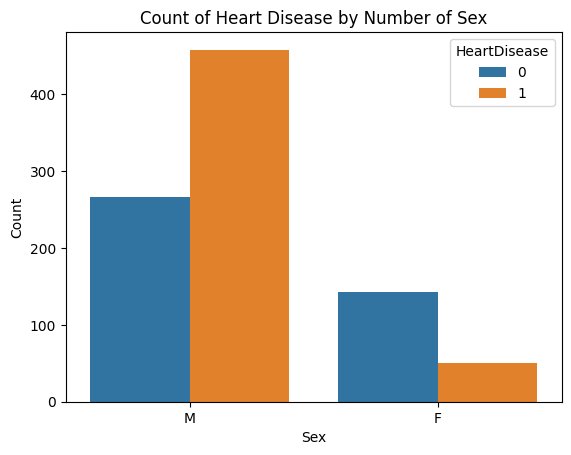

In [ ]:
sns.countplot(data=data, x='Sex', hue='HeartDisease')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Count of Heart Disease by Number of Sex')
plt.show()

### here it represents counts of males having  heart disease and having no heart disease meanwhile same for females

#Violin Plot#

A violin plot is a hybrid of a box plot and a kernel density plot, which shows peaks in the data. It is used to visualize the distribution of numerical data. Unlike a box plot that can only show summary statistics, violin plots depict summary statistics and the density of each variable.

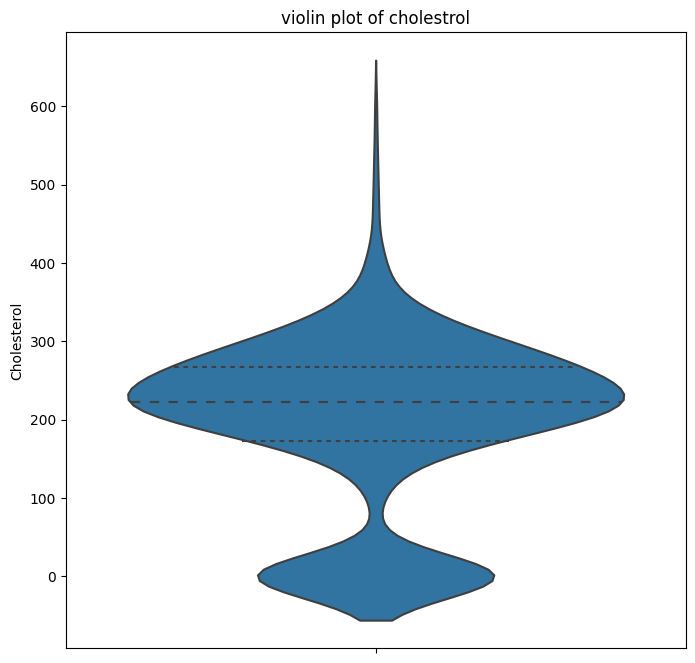

In [ ]:
plt.figure(figsize = (8,8))
sns.violinplot(y = 'Cholesterol', hue = 'Oldpeak', data = data, split = True, inner = 'quart')
plt.title('violin plot of cholestrol')
plt.show()

Here we conclude that the violin plot of Cholestrol represents its max value as 603.

##Heat Map##

### Heatmap is a graphical way to visualize visitor behavior data in the form of hot and cold spots employing a warm-to-cool color scheme. The warm colors indicate sections with the most visitor interaction, red being the area of highest interaction, and the cool colors point to the sections with the lowest interaction.

<ipython-input-12-60b6cf4144d6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True,square=True, cmap='coolwarm')


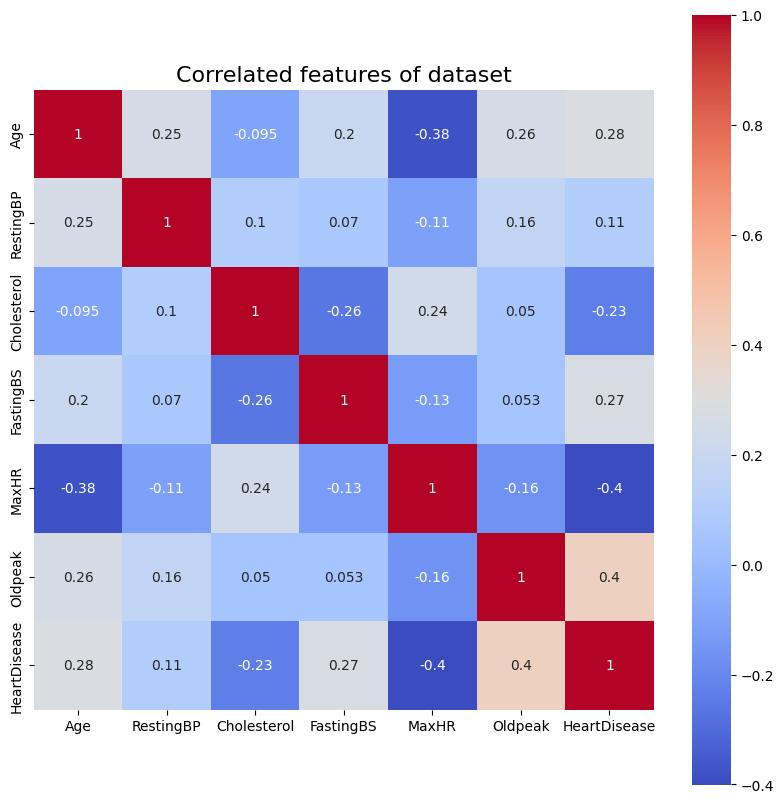

In [ ]:
plt.figure( figsize = (10,10))
sns.heatmap(data.corr(), annot = True,square=True, cmap='coolwarm')
plt.title('Correlated features of dataset', size=16)
plt.show()

##Box Plot##

### Box plots are used to show distributions of numeric data values.They show the median, upper and lower quartiles, minimum and maximum values, and any outliers in the dataset. Outliers can reveal mistakes or unusual occurrences in data.

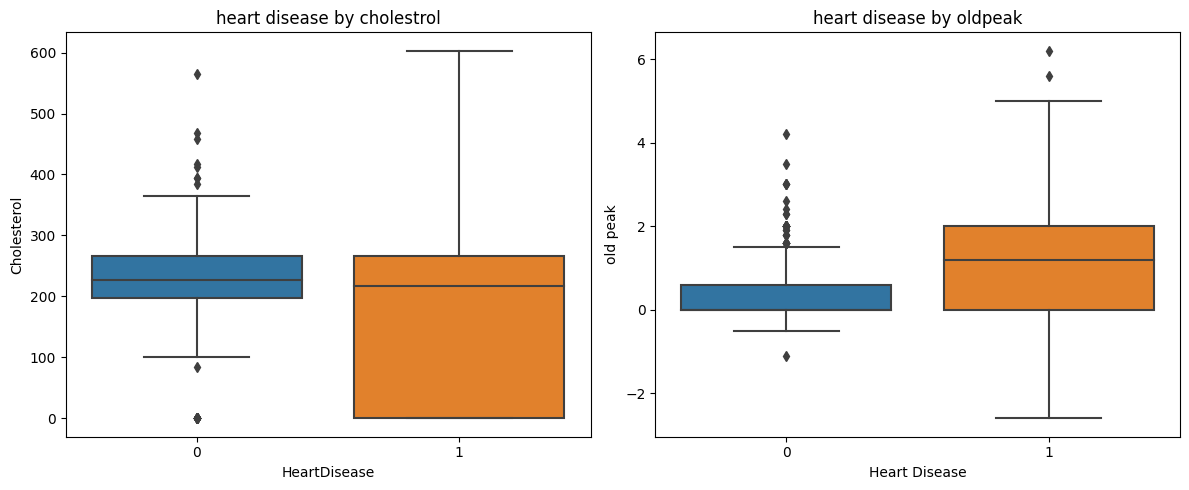

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=data, x="HeartDisease", y="Cholesterol", ax=axes[0])
axes[0].set_xlabel('HeartDisease')
axes[0].set_ylabel('Cholesterol')
axes[0].set_title('heart disease by cholestrol')

sns.boxplot(data=data, x="HeartDisease", y="Oldpeak", ax=axes[1])
axes[1].set_xlabel('Heart Disease')
axes[1].set_ylabel('old peak')
axes[1].set_title('heart disease by oldpeak')

plt.tight_layout()
plt.show()

here it shows the max value,min value, median value,upper quartile and lower quartile.It also show the outliers of the data.

We conclude that heart disease's by cholesteroal are more than heart disease's by Oldpeak.Because longer the box,the more dispersed data.The smaller the less dispersed data.

##Histogram##

### The histogram is a popular graphing tool. It is used to summarize discrete or continuous data that are measured on an interval scale. It is often used to illustrate the major features of the distribution of the data in a convenient form.It is used to check the shape of the distribution

<ipython-input-18-7b59e6f4a46c>:21: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


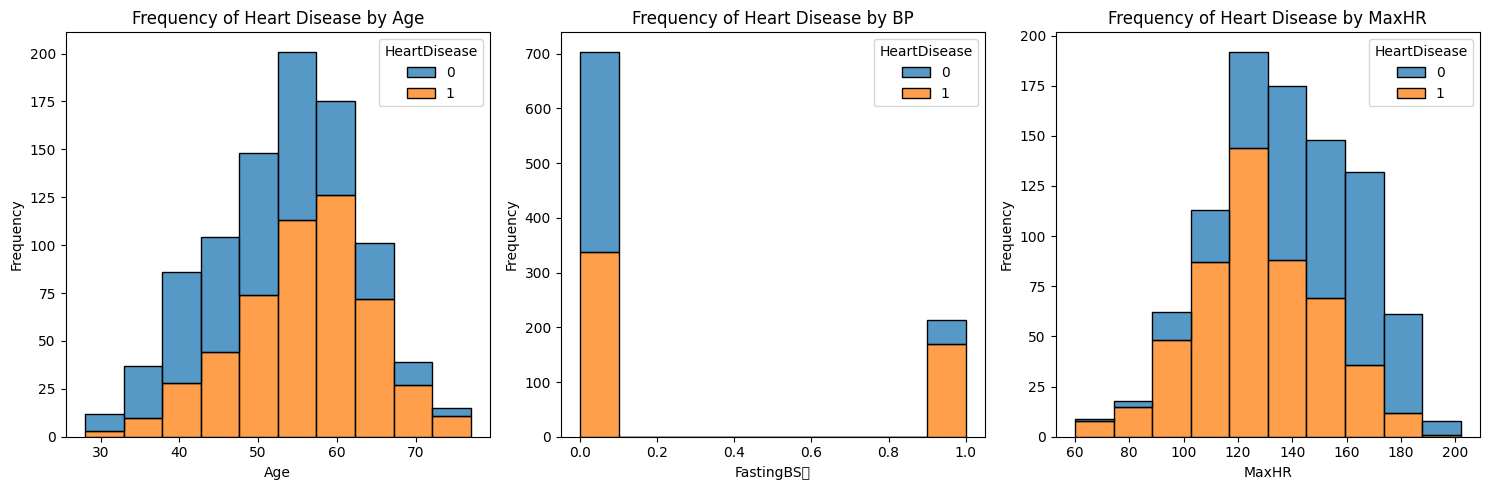

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

#age-heartdisease
sns.histplot(data=data, x='Age', hue='HeartDisease',multiple='stack', bins=10,  ax=axes[0])
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Heart Disease by Age')

#FastingBS - heartdisease
sns.histplot(data=data, x='FastingBS', hue='HeartDisease', bins=10, multiple='stack', ax=axes[1])
axes[1].set_xlabel('FastingBS	')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Frequency of Heart Disease by BP')

#MaxHR - heartdisease
sns.histplot(data=data, x='MaxHR', hue='HeartDisease', bins=10, multiple='stack', ax=axes[2])
axes[2].set_xlabel('MaxHR')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Frequency of Heart Disease by MaxHR')

plt.tight_layout()
plt.show()